In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D:\CSI Assignments\AssignmentWeek5\House Price Prediction Dataset.csv")
df = df.drop(columns=["Id"])
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\krish\AppData\Local\Temp\ipykernel_7696\3607814401.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\CSI Assignments\AssignmentWeek5\House Price Prediction Dataset.csv")


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
df.shape

(2000, 9)

In [4]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [6]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [7]:
df["Location"].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_7696\2461417738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Location",data = df, palette="pastel")


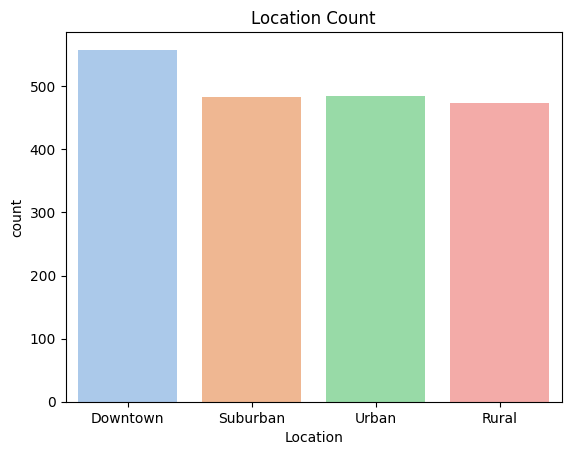

In [28]:
sns.countplot(x = "Location",data = df, palette="pastel")
plt.title("Location Count")
plt.show()

In [9]:
df["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_7696\437838511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Condition",data = df, palette="pastel")


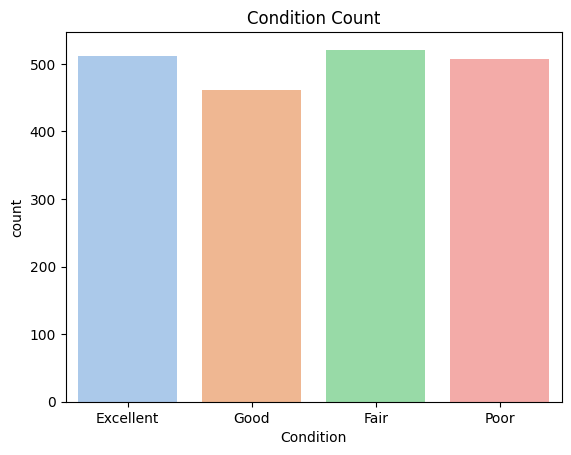

In [27]:
sns.countplot(x = "Condition",data = df, palette="pastel")
plt.title("Condition Count")
plt.show()

In [11]:
df["Garage"].value_counts()

Garage
No     1038
Yes     962
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_7696\947816335.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Garage",data = df, palette="pastel")


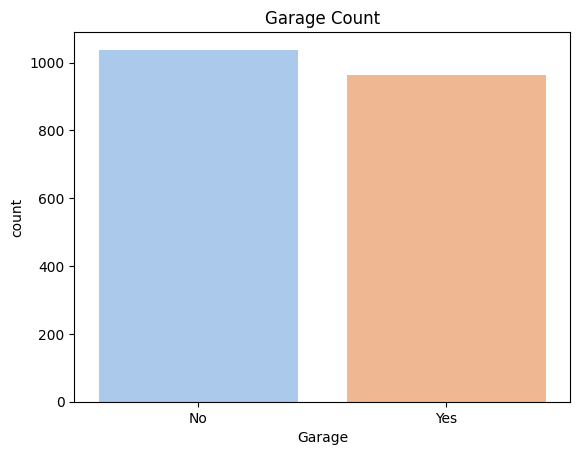

In [26]:
sns.countplot(x = "Garage",data = df, palette="pastel")
plt.title("Garage Count")
plt.show()

In [13]:
df["Bedrooms"].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_7696\1552362068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Bedrooms",data = df, palette="pastel")


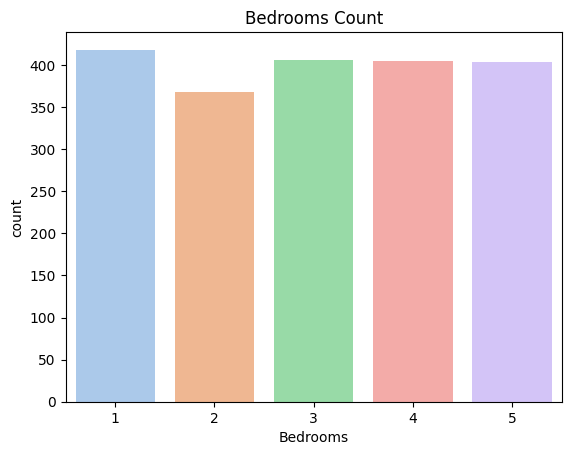

In [25]:
sns.countplot(x = "Bedrooms",data = df, palette="pastel")
plt.title("Bedrooms Count")
plt.show()

In [15]:
df["Bathrooms"].value_counts()

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_7696\1931977207.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Bathrooms",data=df, palette="pastel")


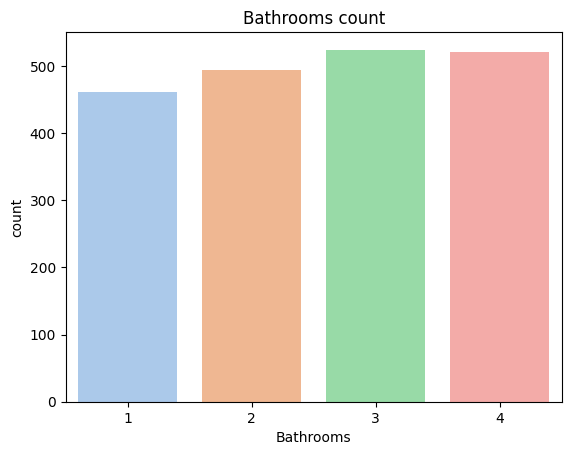

In [24]:
sns.countplot(x = "Bathrooms",data=df, palette="pastel")
plt.title("Bathrooms count")
plt.show()

In [19]:
X = df.drop("Price", axis=1)
y = df["Price"]
# Identify categorical and numerical columns
categorical_cols = ["Location", "Condition", "Garage"]
numerical_cols = X.drop(columns=categorical_cols).columns.tolist()
# Set Up OneHotEncoder with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ],
    remainder="passthrough"
)


In [20]:
# Fit and transform X
X_transformed = preprocessor.fit_transform(X)

In [21]:
# Get encoded column names
encoded_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)

# Combine all feature names: encoded categorical + numerical
feature_names = list(encoded_cols) + numerical_cols


In [22]:
X_df = pd.DataFrame(X_transformed, columns=feature_names)
X_df["Price"] = y

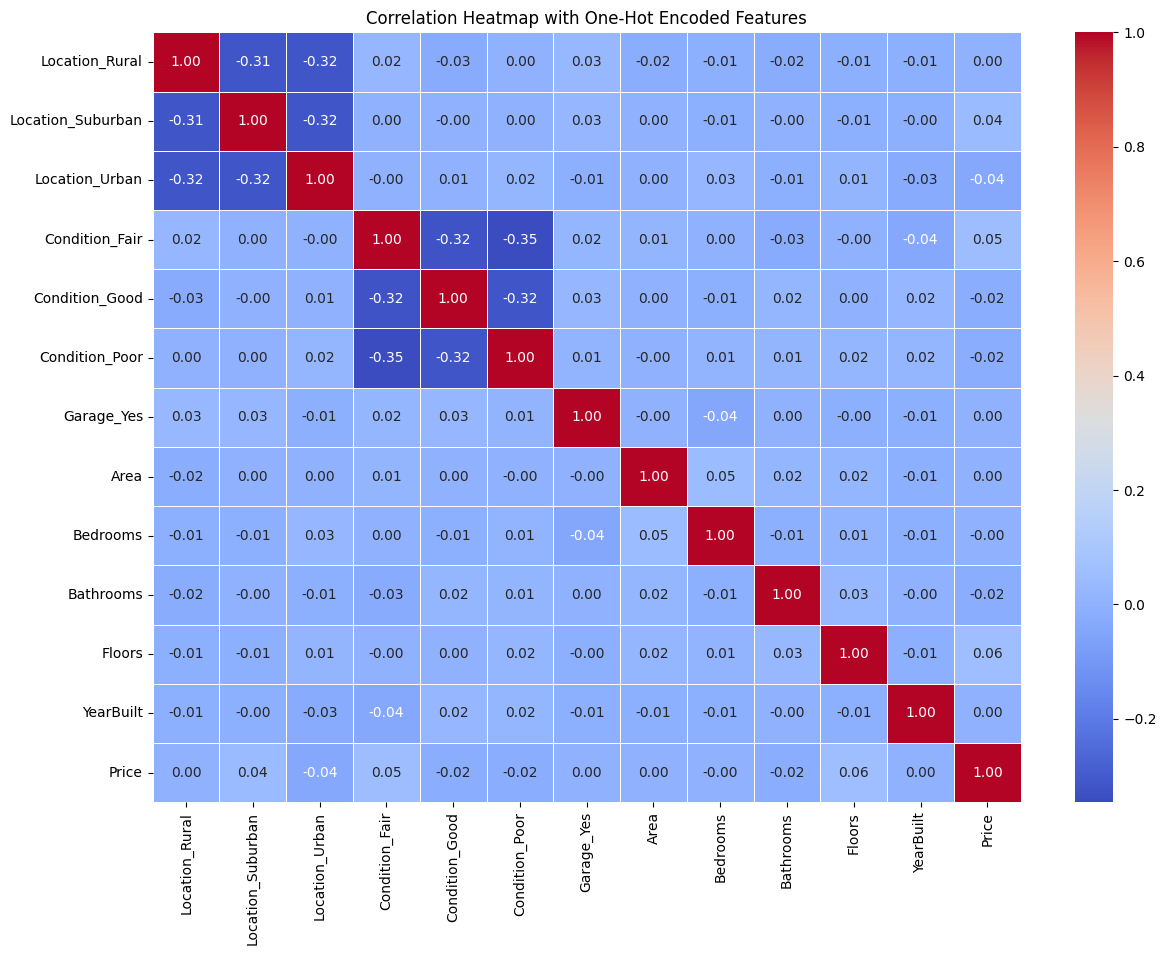

In [23]:
corr = X_df.corr()
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with One-Hot Encoded Features")
plt.show()

In [31]:
print(f"Shape of x: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (2000, 8)
Shape of y: (2000,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}
results = {}

In [45]:
results = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    # Cross-validated R2 score
    cv_r2 = cross_val_score(pipeline, X, y, cv=kfold, scoring="r2")
    
    # Fit and evaluate on test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    test_r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "CV Mean R²": round(np.mean(cv_r2), 4),
        "Test R²": round(test_r2, 4),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2)
    })

results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
results_df



,Model,CV Mean R²,Test R²,RMSE,MAE
0,Linear Regression,-0.0132,-0.0067,279859.73,243241.98
1,Ridge Regression,-0.0132,-0.0067,279859.37,243244.10
4,Gradient Boosting,-0.0362,-0.0360,283895.91,245230.47
3,Random Forest,-0.0750,-0.0990,292409.96,252966.86
5,XGBoost,-0.1289,-0.1411,297953.07,257049.48
2,Decision Tree,-1.0000,-1.0456,398926.00,325400.83


C:\Users\krish\AppData\Local\Temp\ipykernel_7696\3999696781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test R²", palette="crest")


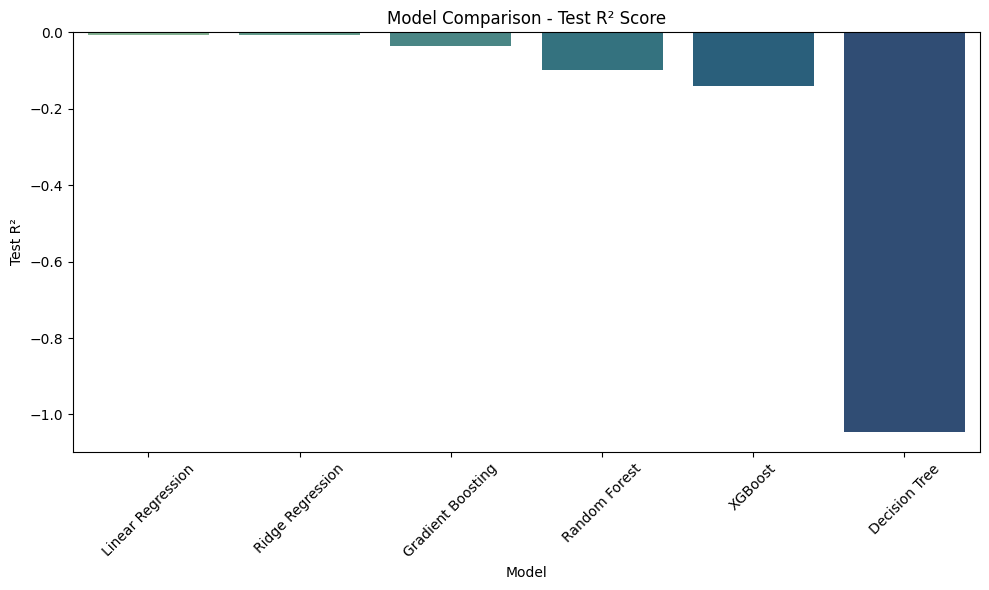

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Test R²", palette="crest")
plt.title("Model Comparison - Test R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_7696\2484403723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="flare")


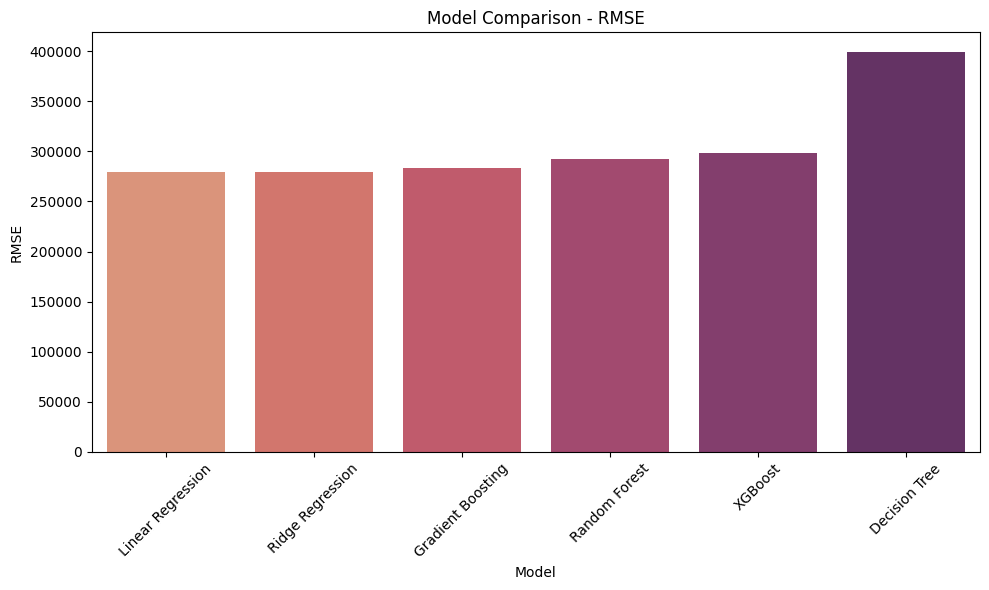

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="flare")
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
